In [1]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [2]:
# specify the risky asset and the time horizon 
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2014-01-01'
END_DATE = '2020-01-01'


In [6]:
# download the data 

df = yf.download([RISKY_ASSET, MARKET_BENCHMARK], start= START_DATE, end = END_DATE,
                adjusted = True)


[*********************100%***********************]  2 of 2 completed


In [9]:
# resample to monthly data and calculate the simple returns

X = df['Adj Close'].rename(columns = {RISKY_ASSET: 'asset', MARKET_BENCHMARK: 'market'}).resample('M').last()\
.pct_change().dropna()

In [14]:
# calculate beta

covariance = X.cov().iloc[0, 1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
beta

1.5420465525798501

In [15]:
# prepare the input and estimate the CAPM as a linear regression

y = X.pop('asset')
X = sm.add_constant(X)

In [39]:
capm_model = sm.OLS(y, X).fit() # Ordinary Least Squares
capm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.367    
Dependent Variable: asset            AIC:                -185.8333
Date:               2021-09-13 18:40 BIC:                -181.2800
No. Observations:   72               Log-Likelihood:     94.917   
Df Model:           1                F-statistic:        42.17    
Df Residuals:       70               Prob (F-statistic): 1.03e-08 
R-squared:          0.376            Scale:              0.0043123
---------------------------------------------------------------------
          Coef.     Std.Err.      t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------
const     0.0120      0.0080    1.4981    0.1386    -0.0040    0.0279
market    1.5420      0.2375    6.4940    0.0000     1.0685    2.0156
------------------------------------------------------------------
Omnibus:               6.011        Durbin-Watson:           1.827
Prob(Omnibus):         0.050        Jarque-Bera (JB):        5.220
Skew:                  0.618        Prob(JB):                0.074
Kurtosis:              3.460        Condition No.:           31   
==================================================================

"""

here market is beta and constant is alpha

In [18]:
# we assumed that there is no risk-free rate
# now we will use treasury bill  as a risk-free rate


In [19]:
# define the length of the period in days
N_DAYS = 90


In [26]:
# download the data from Yahoo Finance
df_rf = yf.download('^IRX', start = START_DATE, end = END_DATE)
rf = df_rf.resample('M').last().Close / 100

[*********************100%***********************]  1 of 1 completed


In [27]:
# calculate risk-free premium and convert values to monthly
rf = (1 / (1 - rf * N_DAYS / 360))  ** (1 / N_DAYS)
rf = (rf ** 30) - 1

Date
2013-12-31    0.00063
2014-01-31    0.00010
2014-02-28    0.00043
2014-03-31    0.00028
2014-04-30    0.00020
               ...   
2019-08-31    0.01933
2019-09-30    0.01770
2019-10-31    0.01498
2019-11-30    0.01565
2019-12-31    0.01505
Freq: M, Name: Close, Length: 73, dtype: float64

<AxesSubplot:title={'center':'Risk-free rate (13 Week Treasury Bill)'}, xlabel='Date'>

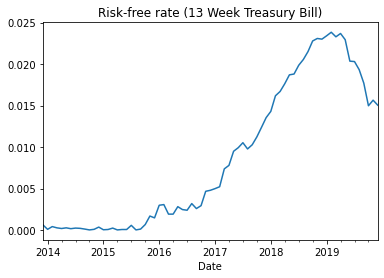

In [28]:
# plot risk-free rate
rf.plot(title = 'Risk-free rate (13 Week Treasury Bill)')

In [29]:
# last approach is to approximate the risk-free rate using the 3-Month Treasury Bill (Secondary Market Rate)


In [30]:
import pandas_datareader.data as web


In [31]:
rf = web.DataReader('TB3MS', 'fred', start = START_DATE, end = END_DATE)

In [32]:
# convert to monthly values
rf = (1 + (rf/100))  ** (1 / 12) - 1

<AxesSubplot:title={'center':'Risk-free rate (3-Month Treasury Bill)'}, xlabel='DATE'>

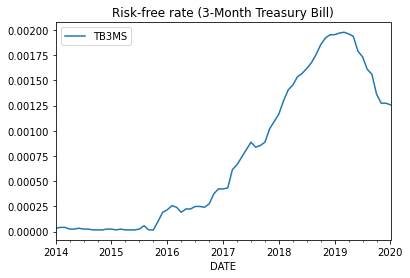

In [37]:
# plot calculated risk free rate
rf.plot(title = 'Risk-free rate (3-Month Treasury Bill)')